In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
def info_data (df):
    print("SHAPE OF DATA ".center(70, '-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" Types ".center(70, '-'))
    print(df.dtypes)
    print("missing values".center(70, '-'))
    print(df.isnull().sum())
    print("Some statistical measures".center(70, '-'))
    print(df.describe())


info_data(df)

----------------------------SHAPE OF DATA ----------------------------
Rows:284807
Columns: 31
------------------------------- Types --------------------------------
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
----------------------------missing values----------------------------
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop(['Time'], axis = 1)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.duplicated().any()

True

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(275663, 30)

In [ ]:
df['Class'].value_counts()

,count
Class,
0,275190
1,473


<ipython-input-48-695372982e33>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


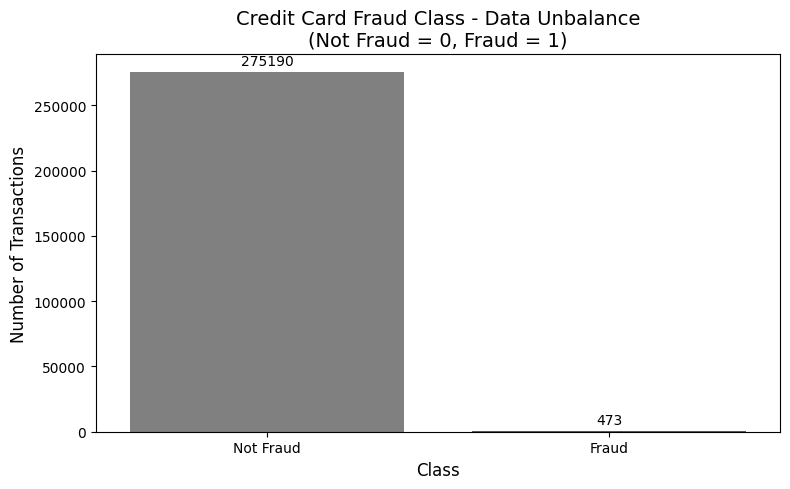

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب القيم
temp = df["Class"].value_counts()
class_data = pd.DataFrame({'Class': temp.index, 'values': temp.values})

# إعداد الرسم
plt.figure(figsize=(8, 5))
sns.barplot(
    x=class_data['Class'],
    y=class_data['values'],
    palette=['gray', 'red']
)

# إعداد العناوين والتسميات
plt.title('Credit Card Fraud Class - Data Unbalance\n(Not Fraud = 0, Fraud = 1)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Not Fraud", "Fraud"], fontsize=10)
plt.yticks(fontsize=10)

# عرض القيم على الأعمدة
for i, value in enumerate(class_data['values']):
    plt.text(i, value + max(class_data['values']) * 0.02, str(value), ha='center', fontsize=10)

# عرض الرسم
plt.tight_layout()
plt.show()


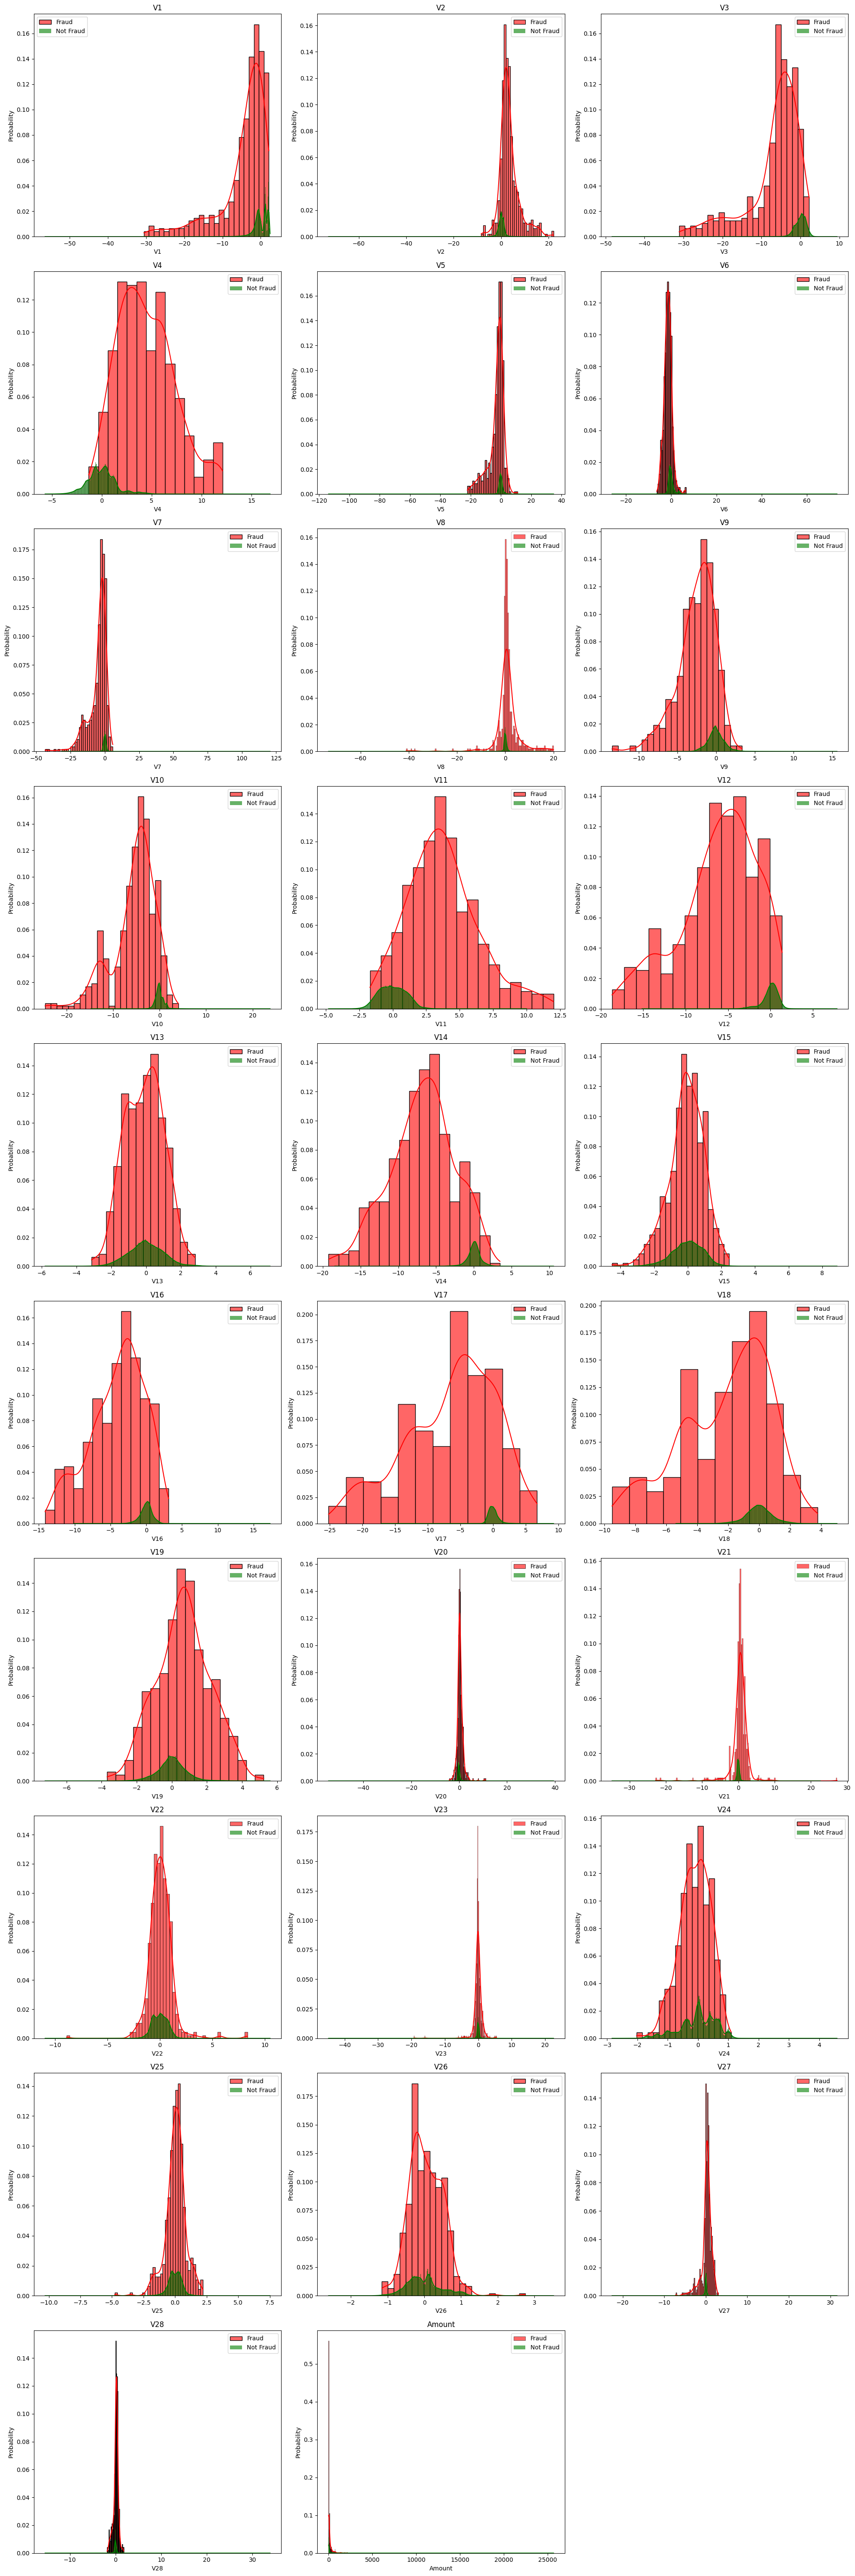

In [ ]:
fraud = df[df['Class'] == 1]
not_fraud = df[df['Class'] == 0]

figure = plt.figure(figsize=(20, 60))
cols = (df.columns).to_list()

for i, col in enumerate(cols):
    if col == 'Class':
        continue

    plt.subplot(10, 3, i + 1)
    sns.histplot(fraud[col], color='red', kde=True, stat='probability', label='Fraud', alpha=0.6)
    sns.histplot(not_fraud[col], color='green', kde=True, stat='probability', label='Not Fraud', alpha=0.6)

    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
fraud.shape

(473, 30)

In [ ]:
not_fraud.shape

(275190, 30)

In [ ]:
fraud_fcc = len(fraud)/float(len(df))
not_fraud_fcc = len(not_fraud)/float(len(df))
print("Fraud Percentage: ", fraud_fcc)
print("Not Fraud Percentage: ", not_fraud_fcc)

Fraud Percentage:  0.0017158632097887638
Not Fraud Percentage:  0.9982841367902112


In [ ]:
fraud.Amount.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [ ]:
not_fraud.Amount.describe()

,Amount
count,275190.000000
mean,90.521154
std,253.198478
min,0.000000
25%,6.390000
50%,23.750000
75%,79.900000
max,25691.160000


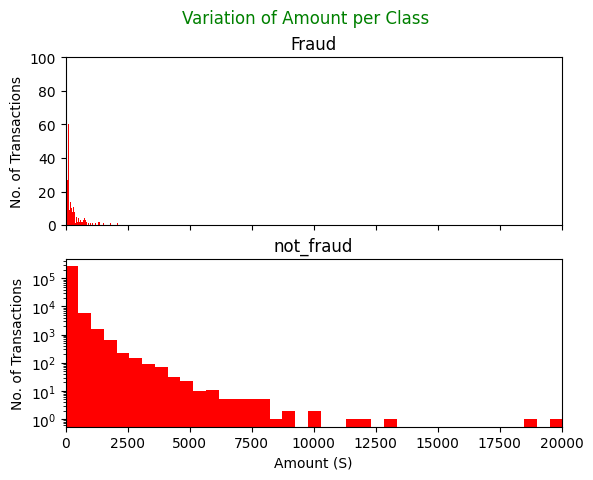

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
ncols=1,
sharex=True)
fig.suptitle("Variation of Amount per Class", color='green') # Change colors to color
bins=50
ax0.hist (fraud['Amount'], bins=bins, color='red' ) # Change 'Anount ' to 'Amount' and colors to color
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')
ax1.hist(not_fraud['Amount'], bins=bins, color='red') # Change 'Anount' to 'Amount' and colors to color
ax1.set_title("not_fraud")
ax1.set_ylabel('No. of Transactions') # Change axl to ax1
plt.xlim(0, 20000)
plt.xlabel( 'Amount (S)')
plt.yscale("log")

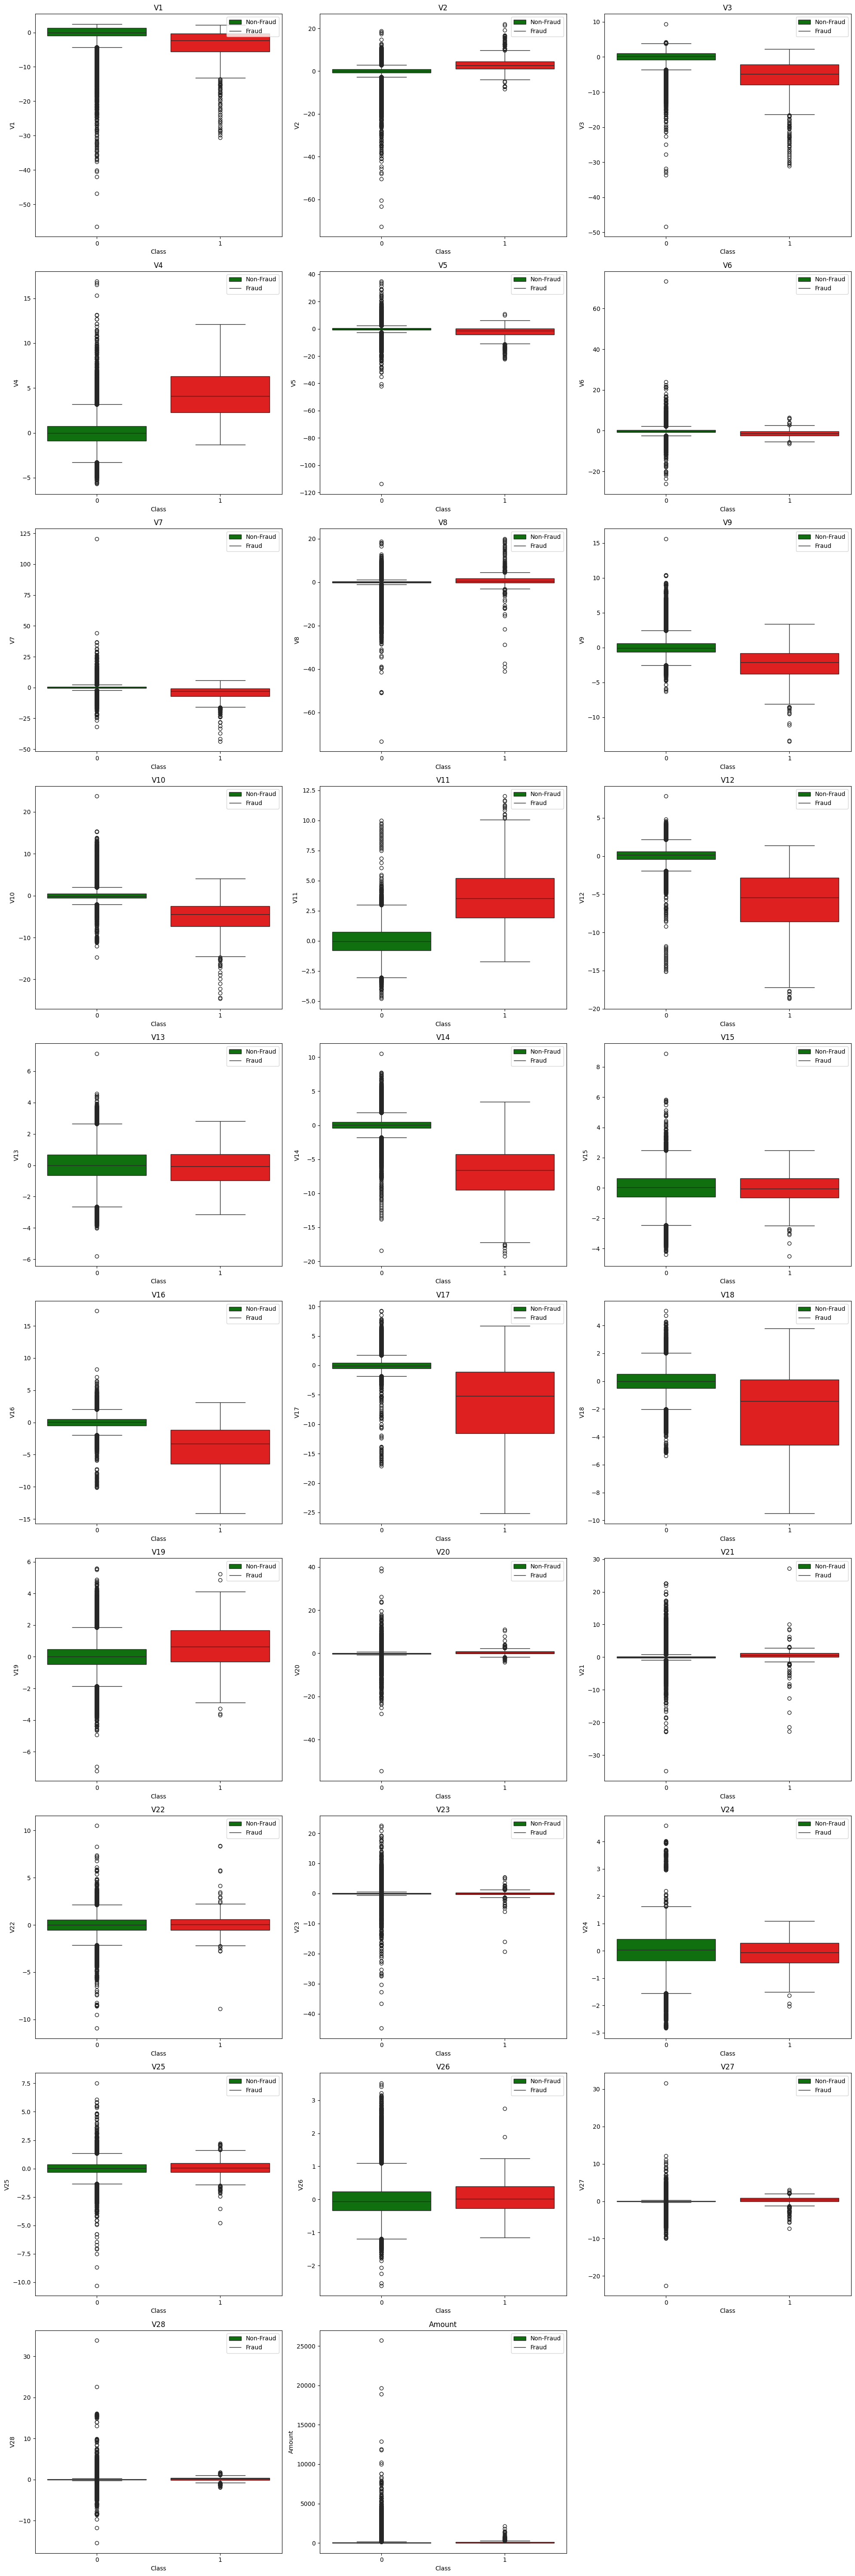

In [ ]:
figure = plt.figure(figsize=(20, 60))

for i, col in enumerate(cols):
    if col == 'Class':
        continue

    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=df, hue='Class', palette=['green', 'red'])

    plt.title(col)
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# استخراج الأعمدة العددية (باستثناء "Class")
numeric_columns = df.drop(columns=['Class']).select_dtypes(include=['float64', 'int64']).columns

# نسخ البيانات للعمل عليها
df_cleaned = df.copy()

# التعامل مع القيم المتطرفة باستخدام IQR
for col in numeric_columns:
    Q1 = df_cleaned[col].quantile(0.25)  # الربع الأول
    Q3 = df_cleaned[col].quantile(0.75)  # الربع الثالث
    IQR = Q3 - Q1                        # مجال القيم بين الربعين

    # تحديد القيم الحدودية المقبولة
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # استبدال القيم المتطرفة بالحدود
    df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# طباعة معلومات عن البيانات بعد التنظيف
print("Data cleaned. Shape:", df_cleaned.shape)


Data cleaned. Shape: (275663, 30)


In [ ]:
df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]


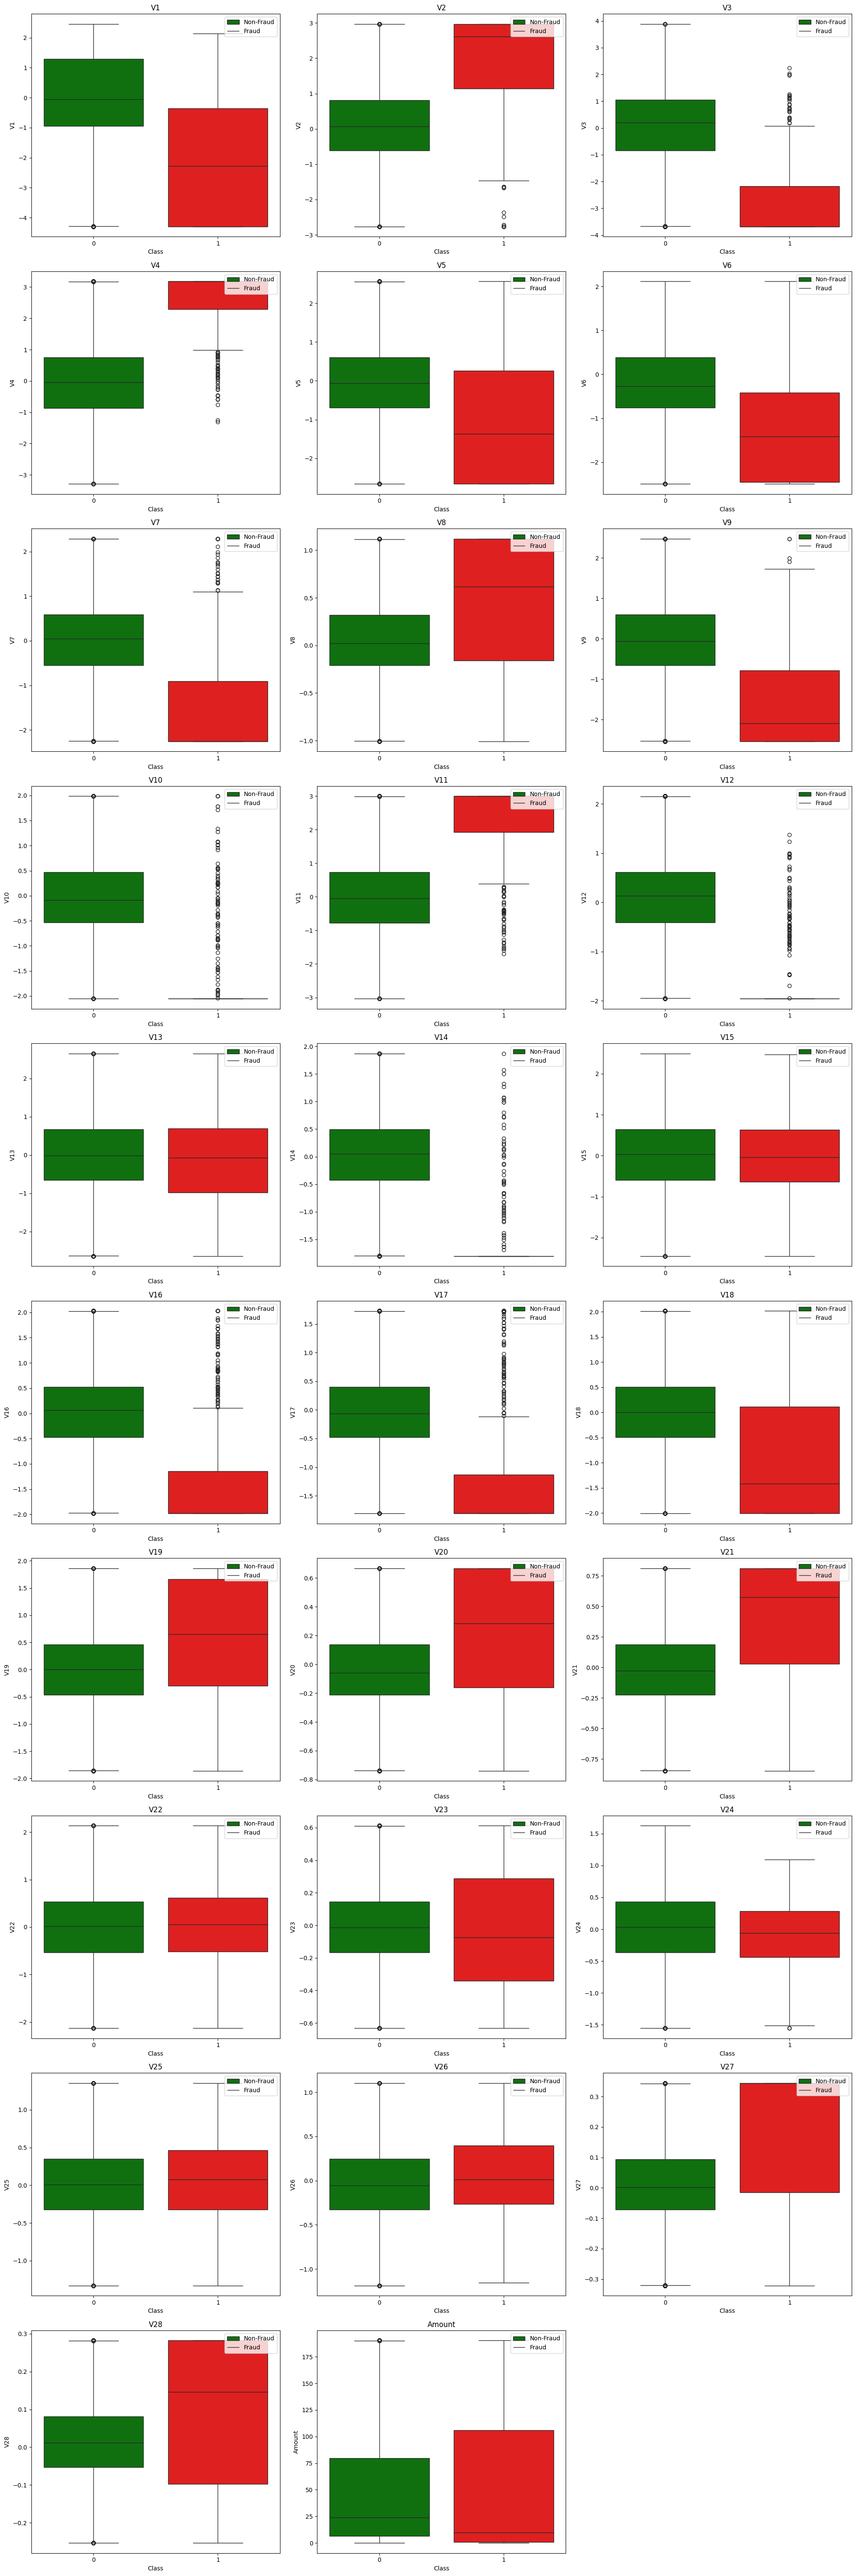

In [ ]:
figure = plt.figure(figsize=(20, 60))

for i, col in enumerate(cols):
    if col == 'Class':
        continue

    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=df_cleaned, hue='Class', palette=['green', 'red'])

    plt.title(col)
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# def detect_outliers_with_zscore(df):
#     """
#     Detect and handle outliers using Z-score.

#     Parameters:
#         df: DataFrame containing the dataset.

#     Returns:
#         df_cleaned_zscore: DataFrame with outliers handled.
#     """
#     from scipy.stats import zscore

#     # Extract numeric columns (excluding 'Class' column)
#     numeric_columns = df.drop(columns=['Class'], errors='ignore').select_dtypes(include=['float64', 'int64']).columns

#     # Copy the dataset to preserve the original
#     df_cleaned_zscore = df.copy()

#     # Compute Z-scores and handle outliers
#     for col in numeric_columns:
#         z_scores = zscore(df_cleaned_zscore[col])
#         df_cleaned_zscore = df_cleaned_zscore[(z_scores > -3) & (z_scores < 3)]

#     print("Data cleaned using Z-score. Shape:", df_cleaned_zscore.shape)
#     return df_cleaned_zscore

In [ ]:
# # Call the function to clean the dataset
# df_cleaned_zscore = detect_outliers_with_zscore(df)



In [ ]:

# Reassign the cleaned DataFrame to `df`
df = df_cleaned

In [ ]:
def draw_correlation_heatmap(df):
    """
    Draw a heatmap for the correlation matrix of the given DataFrame.

    Parameters:
        df: DataFrame containing the dataset.
    """
    plt.figure(figsize=(12, 10))  # Adjust figure size as needed
    correlation_matrix = df.corr()
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="RdBu",
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        square=True
    )
    plt.title("Correlation Matrix Heatmap", fontsize=16)
    plt.xticks(fontsize=10, rotation=45, ha="right")
    plt.yticks(fontsize=10, rotation=0)
    plt.tight_layout()
    plt.show()

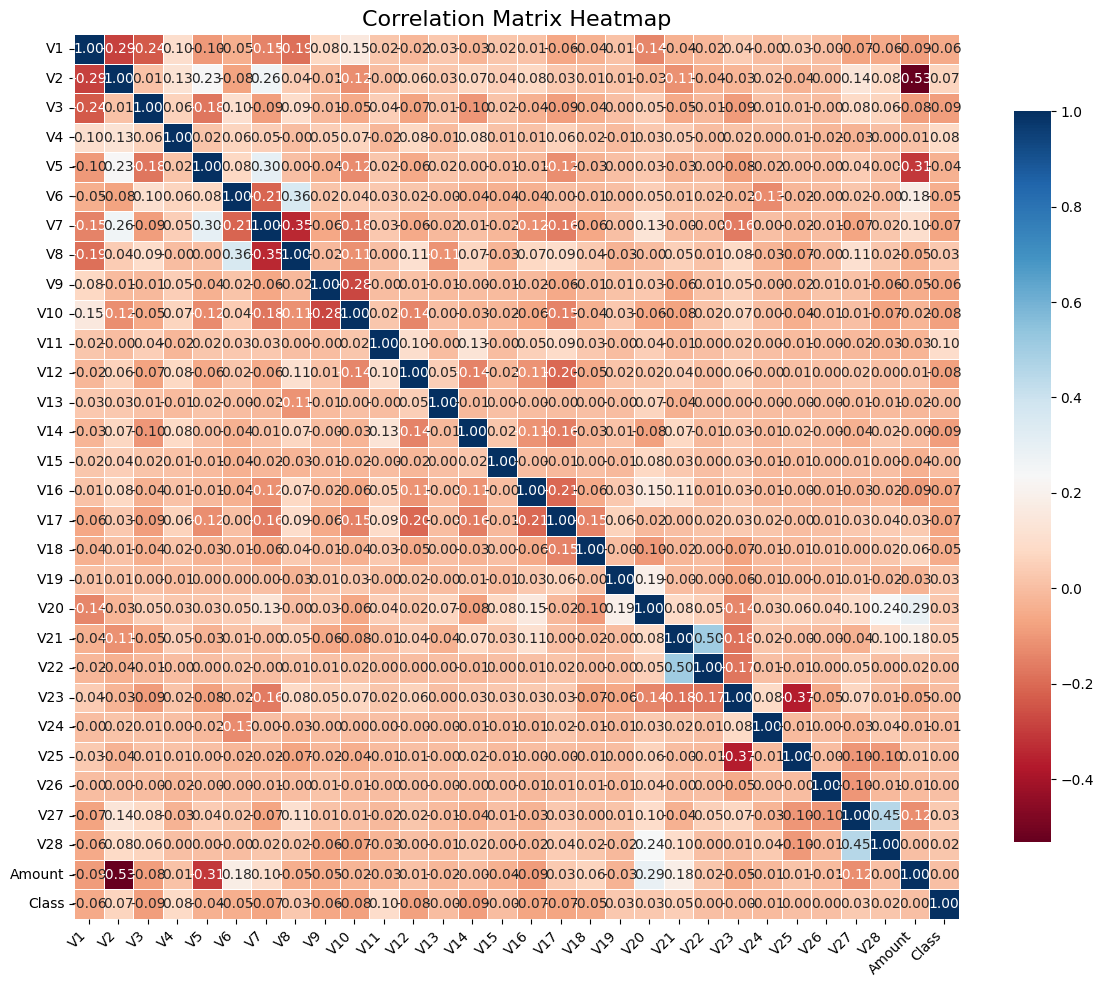

In [ ]:
draw_correlation_heatmap(df)

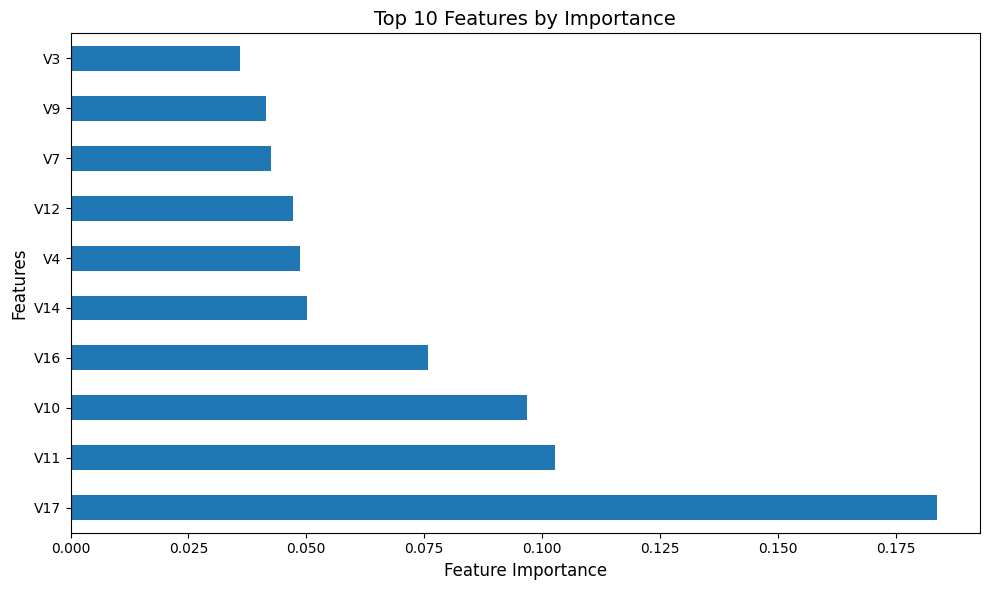

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Select features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Reduce the number of estimators for faster runtime
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X, y)

# Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Features by Importance', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
def drop_highly_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()  # Absolute correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print(f"Features to drop due to high correlation: {to_drop}")
    df_dropped = df.drop(columns=to_drop)
    return df_dropped

# Apply to your dataset (excluding 'Class')
df_reduced = drop_highly_correlated_features(df.drop(columns=['Class']), threshold=0.8)
X = df_reduced
y = df['Class']


Features to drop due to high correlation: []


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 20 features based on f_classif
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")



Selected features: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# RandomUnderSampler: Resample the scaled data
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_scaled, y)
print("Resampled class distribution (RandomUnderSampler):", Counter(y_resampled_rus))



Resampled class distribution (RandomUnderSampler): Counter({0: 473, 1: 473})


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=3)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_scaled, y)
print("Original class distribution:", Counter(y))
print("SMOTE class distribution:", Counter(y_resampled_smote))



Original class distribution: Counter({0: 275190, 1: 473})
SMOTE class distribution: Counter({0: 275190, 1: 275190})


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a classification model and returns evaluation metrics.

    Parameters:
        model: Trained classification model.
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): True labels for the test set.

    Returns:
        dict: Dictionary containing accuracy, precision, recall, F1-score, ROC-AUC,
              confusion matrix, and classification report.
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics Calculation
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # ROC Curve
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

    # Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print metrics in readable format
    print("\nEvaluation Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(class_report)

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': class_report
    }

In [ ]:
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (pd.DataFrame or np.array): Features.
        y (pd.Series or np.array): Target labels.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        X_train, X_test, y_train, y_test: Split training and testing datasets.
    """
    from sklearn.model_selection import train_test_split

    print("Splitting Datasets...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print("Successfully split the dataset!")
    print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

    return X_train, X_test, y_train, y_test


In [ ]:
def LR_model_with_gridsearch(X, y):
    """
    Logistic Regression Model with hyperparameter tuning using GridSearchCV.

    Parameters:
        X (pd.DataFrame or np.array): Features.
        y (pd.Series or np.array): Target labels.

    Returns:
        grid_search: Trained GridSearchCV object with the best parameters.
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Call the reusable split_data function
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Define hyperparameter grid
    param_grid = {
        'penalty': ['l1', 'l2'],              # Regularization
        'C': [0.1, 1, 10],                   # Regularization strength
        'solver': ['liblinear'],             # Solver compatible with l1 and l2
        'class_weight': ['balanced']         # Handle class imbalance
    }

    # Set up GridSearchCV
    print("Tuning Logistic Regression with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=LogisticRegression(random_state=42),
        param_grid=param_grid,
        scoring='f1',  # Use F1-score for optimization
        cv=3,          # 3-fold cross-validation
        n_jobs=-1,     # Use all available CPUs
        verbose=1      # Verbosity
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    return grid_search, X_test, y_test



Training Logistic Regression with RandomUnderSampler data...
Splitting Datasets...
Successfully split the dataset!
Training set size: (756, 20), Test set size: (190, 20)
Tuning Logistic Regression with GridSearchCV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Evaluating Logistic Regression with RandomUnderSampler data...


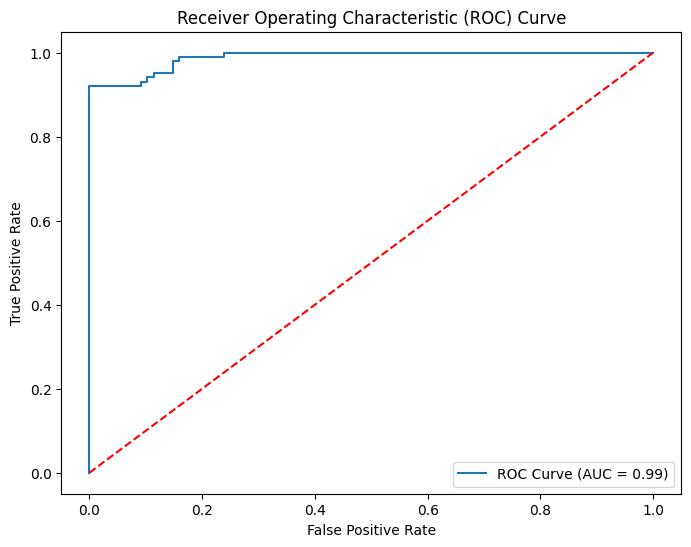

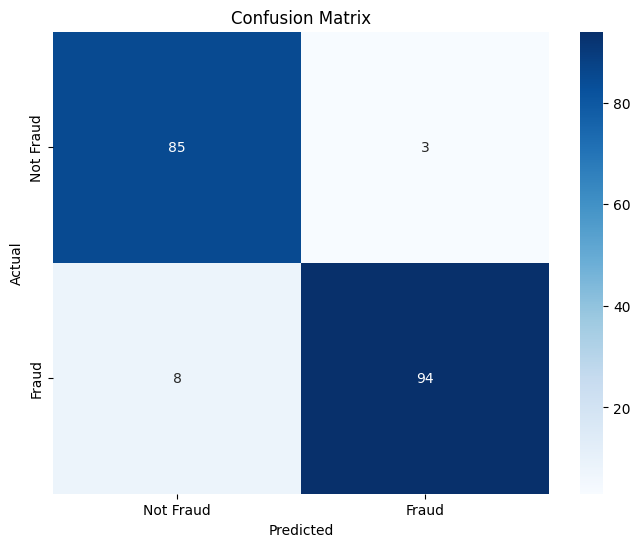


Evaluation Metrics:
Accuracy: 0.9421
Precision: 0.9691
Recall: 0.9216
F1-Score: 0.9447
ROC-AUC: 0.9887

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        88
           1       0.97      0.92      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190


Evaluation Results for RandomUnderSampler:
Accuracy: 0.9421
Precision: 0.9691
Recall: 0.9216
F1_score: 0.9447
Roc_auc: 0.9887

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        88
           1       0.97      0.92      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



In [ ]:
# Logistic Regression with RandomUnderSampler data
print("\nTraining Logistic Regression with RandomUnderSampler data...")
grid_search_rus, X_test_rus, y_test_rus = LR_model_with_gridsearch(X_resampled_rus, y_resampled_rus)

# Evaluate the model
print("\nEvaluating Logistic Regression with RandomUnderSampler data...")
evaluation_results_rus = evaluate_model(grid_search_rus.best_estimator_, X_test_rus, y_test_rus)

# Print Evaluation Results
print("\nEvaluation Results for RandomUnderSampler:")
for metric, value in evaluation_results_rus.items():
    if metric not in ['confusion_matrix', 'classification_report']:
        print(f"{metric.capitalize()}: {value:.4f}")
    elif metric == 'classification_report':
        print("\nClassification Report:\n", value)




Training Logistic Regression with SMOTE data...
Splitting Datasets...
Successfully split the dataset!
Training set size: (440304, 20), Test set size: (110076, 20)
Tuning Logistic Regression with GridSearchCV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Evaluating Logistic Regression with SMOTE data...


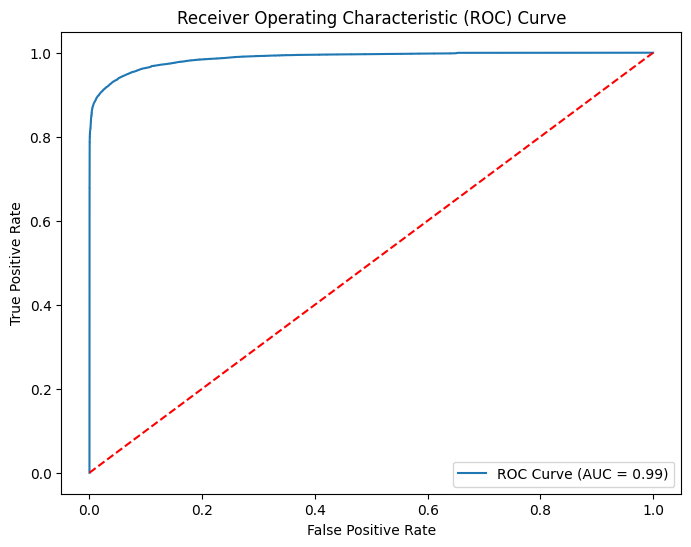

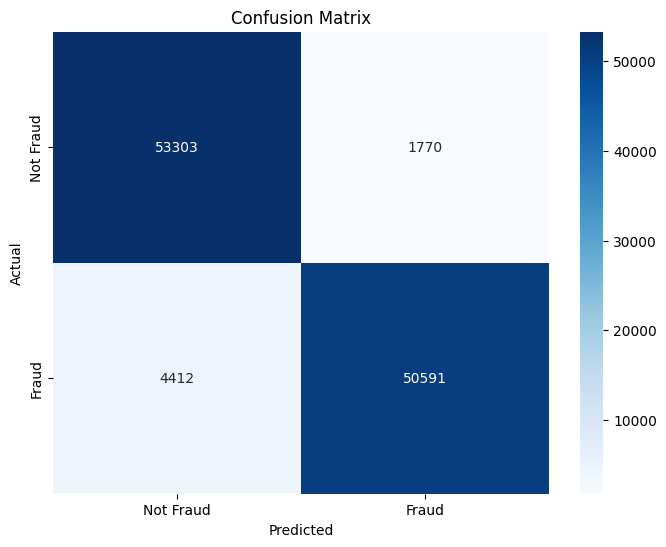


Evaluation Metrics:
Accuracy: 0.9438
Precision: 0.9662
Recall: 0.9198
F1-Score: 0.9424
ROC-AUC: 0.9878

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.92      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.94      0.94      0.94    110076
weighted avg       0.94      0.94      0.94    110076


Evaluation Results for SMOTE:
Accuracy: 0.9438
Precision: 0.9662
Recall: 0.9198
F1_score: 0.9424
Roc_auc: 0.9878

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.92      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.94      0.94      0.94    110076
weighted avg       0.94      0.94      0.94    110076



In [ ]:

# Logistic Regression with SMOTE data
print("\nTraining Logistic Regression with SMOTE data...")
grid_search_smote, X_test_smote, y_test_smote = LR_model_with_gridsearch(X_resampled_smote, y_resampled_smote)

# Evaluate the model
print("\nEvaluating Logistic Regression with SMOTE data...")
evaluation_results_smote = evaluate_model(grid_search_smote.best_estimator_, X_test_smote, y_test_smote)

# Print Evaluation Results
print("\nEvaluation Results for SMOTE:")
for metric, value in evaluation_results_smote.items():
    if metric not in ['confusion_matrix', 'classification_report']:
        print(f"{metric.capitalize()}: {value:.4f}")
    elif metric == 'classification_report':
        print("\nClassification Report:\n", value)


In [ ]:
def KNN_model_with_gridsearch(X, y):
    """
    K-Nearest Neighbors Model with hyperparameter tuning using GridSearchCV.

    Parameters:
        X (pd.DataFrame or np.array): Features.
        y (pd.Series or np.array): Target labels.

    Returns:
        grid_search: Trained GridSearchCV object with the best parameters.
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.neighbors import KNeighborsClassifier

    # Call the reusable split_data function
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Define hyperparameter grid
    param_grid = {
        'n_neighbors': [3, 5],          # Smaller range for neighbors
        'weights': ['uniform'],         # Only 'uniform' for simplicity
        'p': [2]                        # Only Euclidean distance
    }

    # Set up GridSearchCV
    print("Tuning KNN with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=param_grid,
        scoring='f1',  # Use F1-score for optimization
        cv=3,          # 3-fold cross-validation
        n_jobs=-1,     # Use all available CPUs
        verbose=1      # Verbosity
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    return grid_search, X_test, y_test



Training KNN with RandomUnderSampler data...
Splitting Datasets...
Successfully split the dataset!
Training set size: (756, 20), Test set size: (190, 20)
Tuning KNN with GridSearchCV...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Evaluating KNN with RandomUnderSampler data...


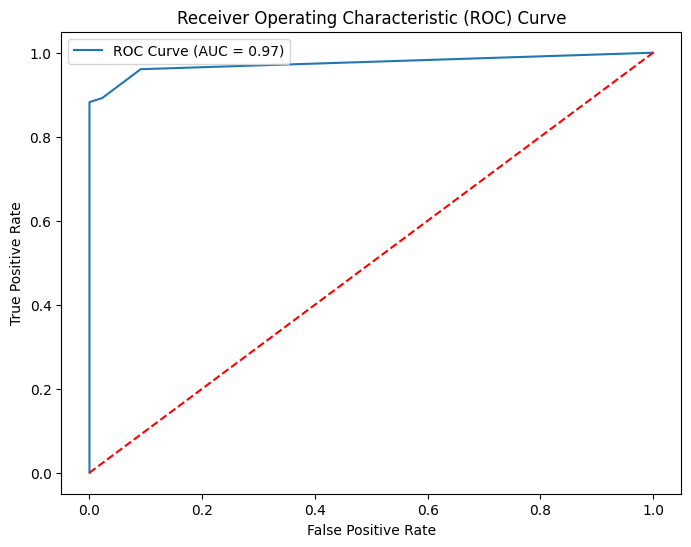

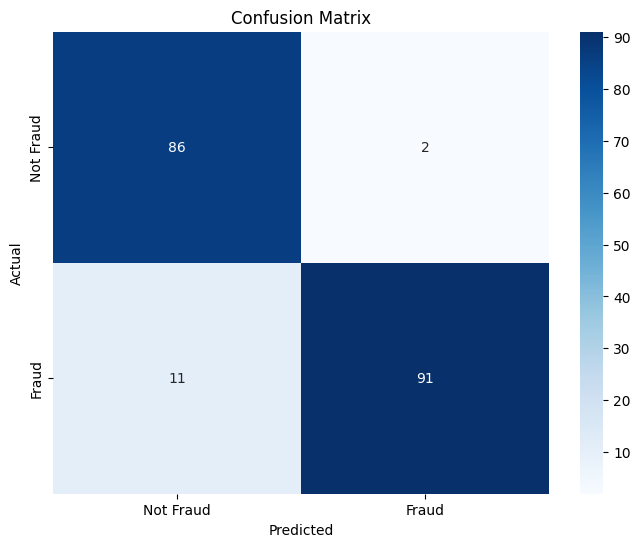


Evaluation Metrics:
Accuracy: 0.9316
Precision: 0.9785
Recall: 0.8922
F1-Score: 0.9333
ROC-AUC: 0.9746

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        88
           1       0.98      0.89      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.94      0.93      0.93       190


Evaluation Results for KNN with RandomUnderSampler:
Accuracy: 0.9316
Precision: 0.9785
Recall: 0.8922
F1_score: 0.9333
Roc_auc: 0.9746

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        88
           1       0.98      0.89      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.94      0.93      0.93       190



In [ ]:
# KNN with RandomUnderSampler data
print("\nTraining KNN with RandomUnderSampler data...")
grid_search_knn_rus, X_test_knn_rus, y_test_knn_rus = KNN_model_with_gridsearch(X_resampled_rus, y_resampled_rus)

# Evaluate the model
print("\nEvaluating KNN with RandomUnderSampler data...")
evaluation_results_knn_rus = evaluate_model(grid_search_knn_rus.best_estimator_, X_test_knn_rus, y_test_knn_rus)

# Print Evaluation Results
print("\nEvaluation Results for KNN with RandomUnderSampler:")
for metric, value in evaluation_results_knn_rus.items():
    if metric not in ['confusion_matrix', 'classification_report']:
        print(f"{metric.capitalize()}: {value:.4f}")
    elif metric == 'classification_report':
        print("\nClassification Report:\n", value)



Training KNN with SMOTE data...
Splitting Datasets...
Successfully split the dataset!
Training set size: (440304, 20), Test set size: (110076, 20)
Tuning KNN with GridSearchCV...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Evaluating KNN with SMOTE data...


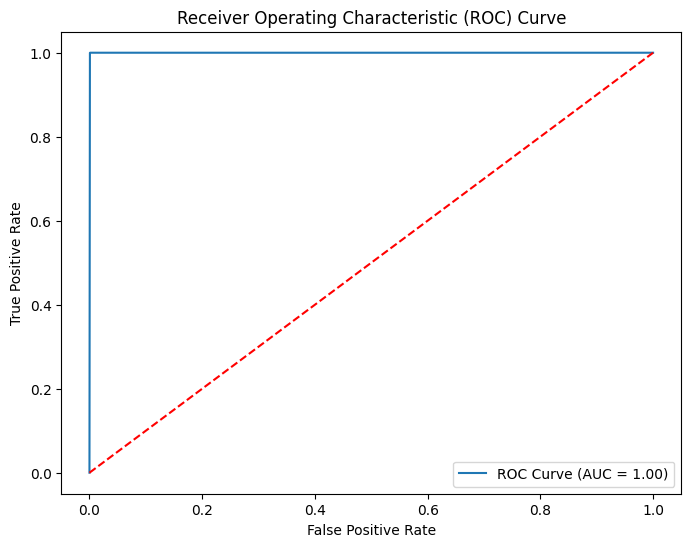

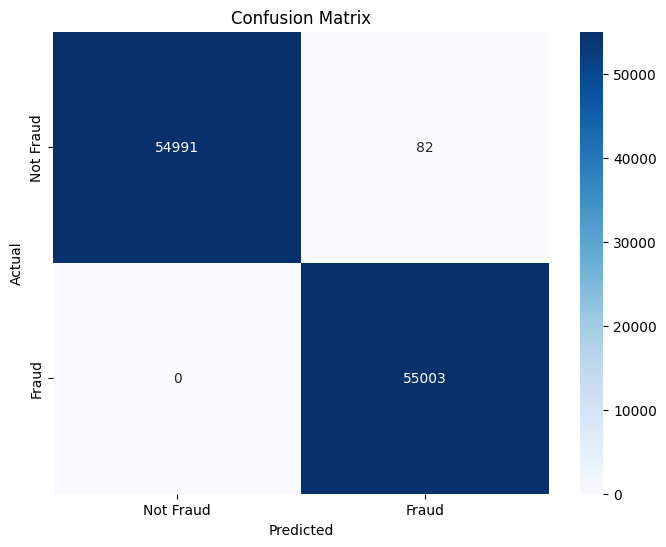


Evaluation Metrics:
Accuracy: 0.9993
Precision: 0.9985
Recall: 1.0000
F1-Score: 0.9993
ROC-AUC: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076


Evaluation Results for KNN with SMOTE:
Accuracy: 0.9993
Precision: 0.9985
Recall: 1.0000
F1_score: 0.9993
Roc_auc: 0.9996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



In [ ]:
# KNN with SMOTE data
print("\nTraining KNN with SMOTE data...")
grid_search_knn_smote, X_test_knn_smote, y_test_knn_smote = KNN_model_with_gridsearch(X_resampled_smote, y_resampled_smote)

# Evaluate the model
print("\nEvaluating KNN with SMOTE data...")
evaluation_results_knn_smote = evaluate_model(grid_search_knn_smote.best_estimator_, X_test_knn_smote, y_test_knn_smote)

# Print Evaluation Results
print("\nEvaluation Results for KNN with SMOTE:")
for metric, value in evaluation_results_knn_smote.items():
    if metric not in ['confusion_matrix', 'classification_report']:
        print(f"{metric.capitalize()}: {value:.4f}")
    elif metric == 'classification_report':
        print("\nClassification Report:\n", value)

In [ ]:
def SVM_model_with_gridsearch(X, y):
    """
    Support Vector Machine Model with hyperparameter tuning using GridSearchCV.

    Parameters:
        X (pd.DataFrame or np.array): Features.
        y (pd.Series or np.array): Target labels.

    Returns:
        grid_search: Trained GridSearchCV object with the best parameters.
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC

    # Call the reusable split_data function
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Define hyperparameter grid
    param_grid = {
        'C': [0.1, 1, 10],          # Regularization strength
        'kernel': ['rbf'],  # Kernel type
        'class_weight': ['balanced']  # Handle class imbalance
    }

    # Set up GridSearchCV
    print("Tuning SVM with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=SVC(probability=True, random_state=42),
        param_grid=param_grid,
        scoring='f1',  # Use F1-score for optimization
        cv=3,          # 3-fold cross-validation
        n_jobs=-1,     # Use all available CPUs
        verbose=1      # Verbosity
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    return grid_search, X_test, y_test



Training SVM with RandomUnderSampler data...
Splitting Datasets...
Successfully split the dataset!
Training set size: (756, 20), Test set size: (190, 20)
Tuning SVM with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}

Evaluating SVM with RandomUnderSampler data...


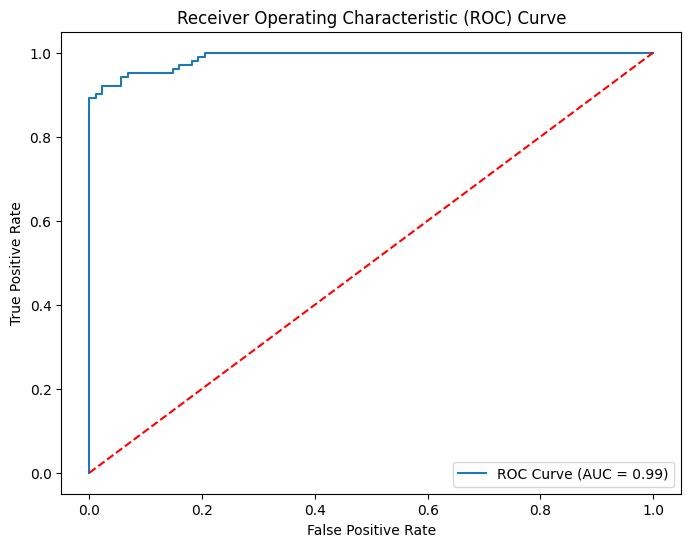

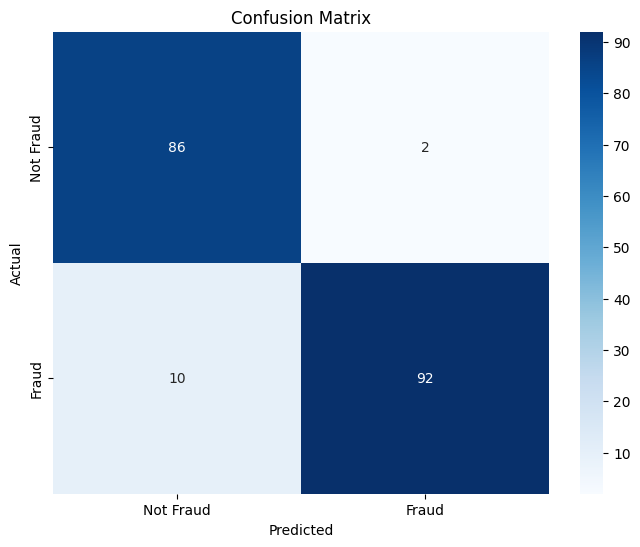


Evaluation Metrics:
Accuracy: 0.9368
Precision: 0.9787
Recall: 0.9020
F1-Score: 0.9388
ROC-AUC: 0.9890

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.98      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190


Evaluation Results for SVM with RandomUnderSampler:
Accuracy: 0.9368
Precision: 0.9787
Recall: 0.9020
F1_score: 0.9388
Roc_auc: 0.9890

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.98      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



In [ ]:
# SVM with RandomUnderSampler data
print("\nTraining SVM with RandomUnderSampler data...")
grid_search_svm_rus, X_test_svm_rus, y_test_svm_rus = SVM_model_with_gridsearch(X_resampled_rus, y_resampled_rus)

# Evaluate the model
print("\nEvaluating SVM with RandomUnderSampler data...")
evaluation_results_svm_rus = evaluate_model(grid_search_svm_rus.best_estimator_, X_test_svm_rus, y_test_svm_rus)

# Print Evaluation Results for RandomUnderSampler
print("\nEvaluation Results for SVM with RandomUnderSampler:")
for metric, value in evaluation_results_svm_rus.items():
    if metric not in ['confusion_matrix', 'classification_report']:
        print(f"{metric.capitalize()}: {value:.4f}")
    elif metric == 'classification_report':
        print("\nClassification Report:\n", value)

In [ ]:
# # SVM with SMOTE data
# print("\nTraining SVM with SMOTE data...")
# grid_search_svm_smote, X_test_sv m_smote, y_test_svm_smote = SVM_model_with_gridsearch(X_resampled_smote, y_resampled_smote)

# # Evaluate the model
# print("\nEvaluating SVM with SMOTE data...")
# evaluation_results_svm_smote = evaluate_model(grid_search_svm_smote.best_estimator_, X_test_svm_smote, y_test_svm_smote)

# # Print Evaluation Results for SMOTE
# print("\nEvaluation Results for SVM with SMOTE:")
# for metric, value in evaluation_results_svm_smote.items():
#     if metric not in ['confusion_matrix', 'classification_report']:
#         print(f"{metric.capitalize()}: {value:.4f}")
#     elif metric == 'classification_report':
#         print("\nClassification Report:\n", value)

In [ ]:
def DecisionTree_model_with_gridsearch(X, y):
    """
    Decision Tree Model with hyperparameter tuning using GridSearchCV.

    Parameters:
        X (pd.DataFrame or np.array): Features.
        y (pd.Series or np.array): Target labels.

    Returns:
        grid_search: Trained GridSearchCV object with the best parameters.
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.tree import DecisionTreeClassifier

    # Call the reusable split_data function
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Define hyperparameter grid
    param_grid = {
        'criterion': ['entropy'],  # Splitting criteria
        'max_depth': [None, 10, 20],       # Tree depth
        'min_samples_split': [2, 5],      # Minimum samples required to split a node
        'min_samples_leaf': [1, 2]        # Minimum samples in a leaf node
    }

    # Set up GridSearchCV
    print("Tuning Decision Tree with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=param_grid,
        scoring='f1',  # Use F1-score for optimization
        cv=3,          # 3-fold cross-validation
        n_jobs=-1,     # Use all available CPUs
        verbose=1      # Verbosity
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    return grid_search, X_test, y_test



Training Decision Tree with RandomUnderSampler data...
Splitting Datasets...
Successfully split the dataset!
Training set size: (756, 20), Test set size: (190, 20)
Tuning Decision Tree with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Evaluating Decision Tree with RandomUnderSampler data...


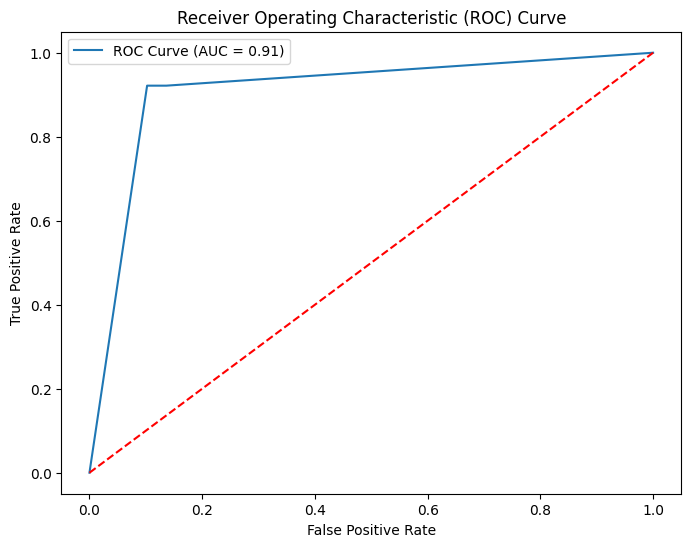

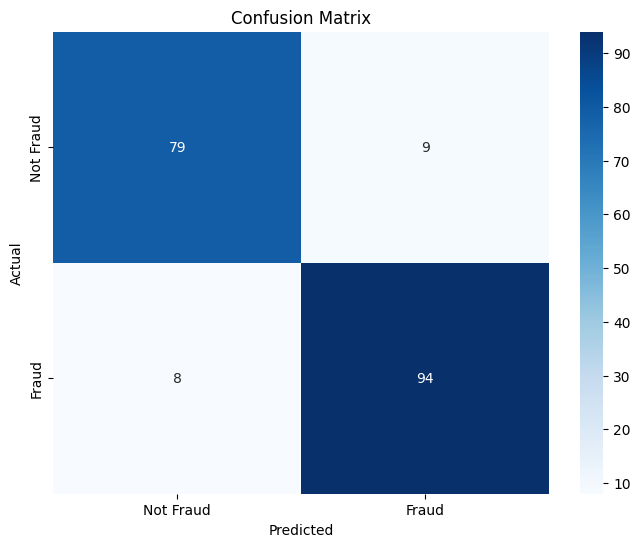


Evaluation Metrics:
Accuracy: 0.9105
Precision: 0.9126
Recall: 0.9216
F1-Score: 0.9171
ROC-AUC: 0.9083

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        88
           1       0.91      0.92      0.92       102

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190


Evaluation Results for Decision Tree with RandomUnderSampler:
Accuracy: 0.9105
Precision: 0.9126
Recall: 0.9216
F1_score: 0.9171
Roc_auc: 0.9083

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90        88
           1       0.91      0.92      0.92       102

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190



In [ ]:
# Decision Tree with RandomUnderSampler data
print("\nTraining Decision Tree with RandomUnderSampler data...")
grid_search_dt_rus, X_test_dt_rus, y_test_dt_rus = DecisionTree_model_with_gridsearch(X_resampled_rus, y_resampled_rus)

# Evaluate the model
print("\nEvaluating Decision Tree with RandomUnderSampler data...")
evaluation_results_dt_rus = evaluate_model(grid_search_dt_rus.best_estimator_, X_test_dt_rus, y_test_dt_rus)

# Print Evaluation Results for RandomUnderSampler
print("\nEvaluation Results for Decision Tree with RandomUnderSampler:")
for metric, value in evaluation_results_dt_rus.items():
    if metric not in ['confusion_matrix', 'classification_report']:
        print(f"{metric.capitalize()}: {value:.4f}")
    elif metric == 'classification_report':
        print("\nClassification Report:\n", value)

In [ ]:
# # Decision Tree with SMOTE data
# print("\nTraining Decision Tree with SMOTE data...")
# grid_search_dt_smote, X_test_dt_smote, y_test_dt_smote = DecisionTree_model_with_gridsearch(X_resampled_smote, y_resampled_smote)

# # Evaluate the model
# print("\nEvaluating Decision Tree with SMOTE data...")
# evaluation_results_dt_smote = evaluate_model(grid_search_dt_smote.best_estimator_, X_test_dt_smote, y_test_dt_smote)

# # Print Evaluation Results for SMOTE
# print("\nEvaluation Results for Decision Tree with SMOTE:")
# for metric, value in evaluation_results_dt_smote.items():
#     if metric not in ['confusion_matrix', 'classification_report']:
#         print(f"{metric.capitalize()}: {value:.4f}")
#     elif metric == 'classification_report':
#         print("\nClassification Report:\n", value)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Best parameters from single models
best_params = {
    'Logistic Regression': {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'},
    'KNN': {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
    'SVM': {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'},
    'Decision Tree': {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
}

# Initialize ensemble models using best parameters
def get_ensemble_models():
    return {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            max_depth=best_params['Decision Tree']['max_depth'],
            criterion=best_params['Decision Tree']['criterion'],
            min_samples_split=best_params['Decision Tree']['min_samples_split'],
            min_samples_leaf=best_params['Decision Tree']['min_samples_leaf'],
            random_state=42
        ),
        'Bagging': BaggingClassifier(
            estimator=DecisionTreeClassifier(
                **best_params['Decision Tree'], random_state=42
            ),
            n_estimators=10,
            random_state=42
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100,
            max_depth=best_params['Decision Tree']['max_depth'],
            learning_rate=0.1,
            min_samples_split=best_params['Decision Tree']['min_samples_split'],
            random_state=42
        ),
        'XGBoost': XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=best_params['Decision Tree']['max_depth'],
            colsample_bytree=1.0,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )
    }

# Evaluate ensemble models
def evaluate_ensemble_models(models, X_train, y_train, X_test, y_test, dataset_name):
    print(f"\nEvaluating models on {dataset_name} data...\n")
    results = {}

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)

        # Evaluate model
        evaluation_results = evaluate_model(model, X_test, y_test)
        results[model_name] = evaluation_results

        # Print Evaluation Results
        print(f"\nEvaluation Results for {model_name} with {dataset_name}:")
        for metric, value in evaluation_results.items():
            if metric not in ['confusion_matrix', 'classification_report']:
                print(f"{metric.capitalize()}: {value:.4f}")
            elif metric == 'classification_report':
                print("\nClassification Report:\n", value)
        print('-' * 80)

    return results


# # Call function for SMOTE data
# ensemble_models_smote = get_ensemble_models()
# print("\nEvaluating Ensemble Models with SMOTE data...")
# results_smote = evaluate_ensemble_models(
#     ensemble_models_smote,
#     X_resampled_smote,
#     y_resampled_smote,
#     X_scaled,
#     y
# )



Evaluating Ensemble Models with RandomUnderSampler data...

Evaluating models on RandomUnderSampler data...

Training Random Forest...


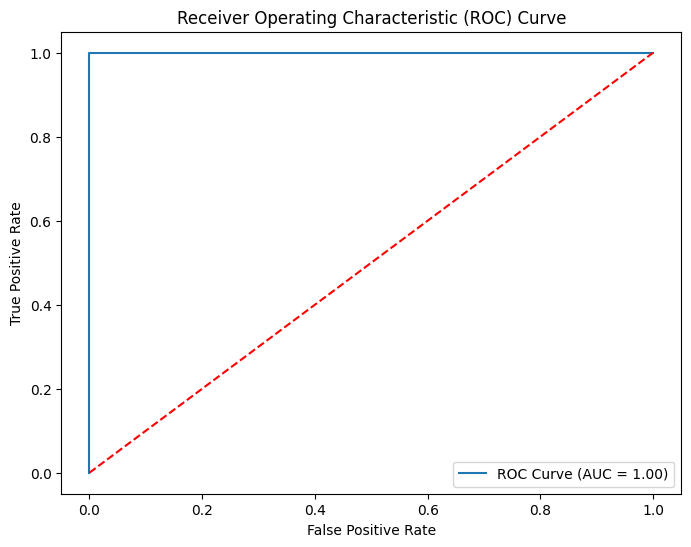

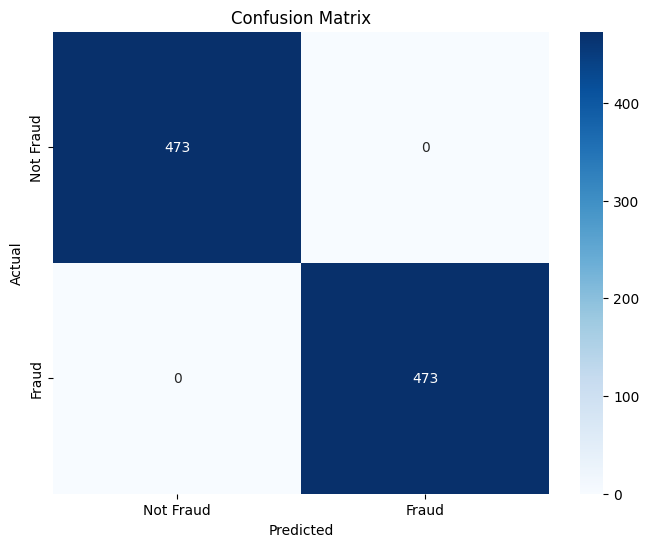


Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946


Evaluation Results for Random Forest with RandomUnderSampler:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1_score: 1.0000
Roc_auc: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946

-----------------------------------------------

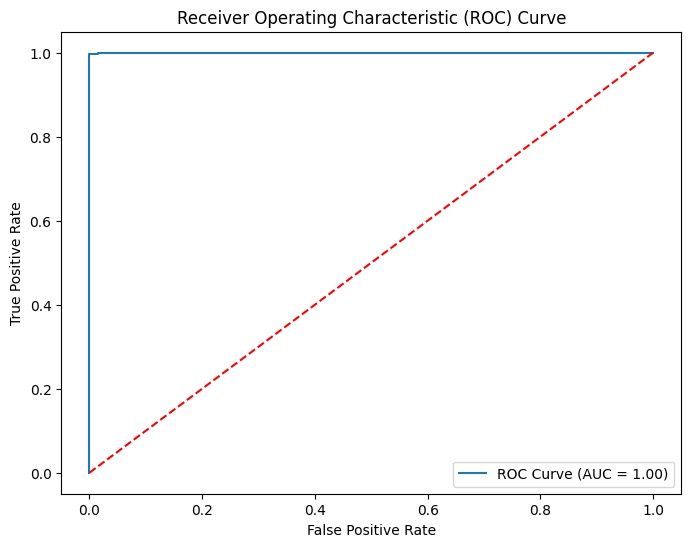

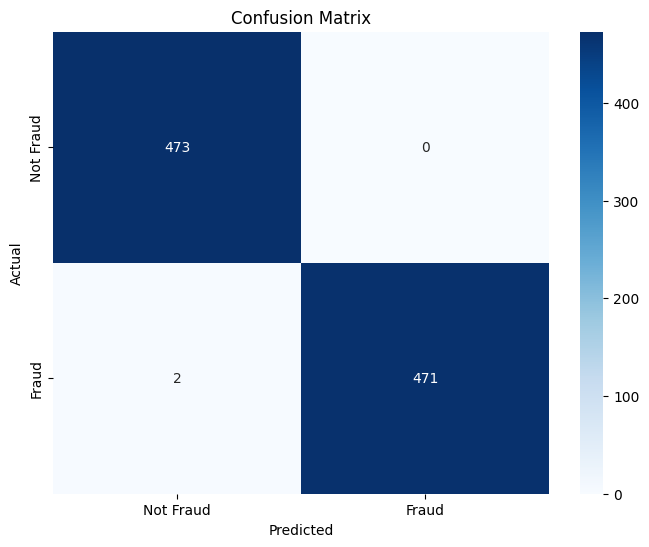


Evaluation Metrics:
Accuracy: 0.9979
Precision: 1.0000
Recall: 0.9958
F1-Score: 0.9979
ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946


Evaluation Results for Bagging with RandomUnderSampler:
Accuracy: 0.9979
Precision: 1.0000
Recall: 0.9958
F1_score: 0.9979
Roc_auc: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946

-----------------------------------------------------

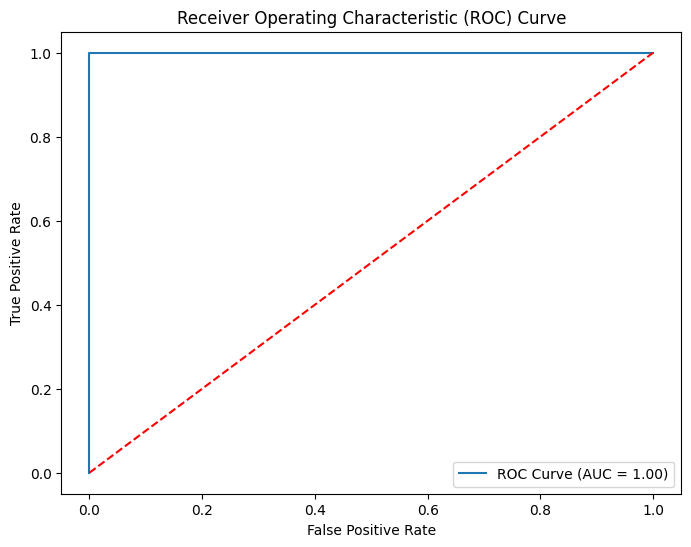

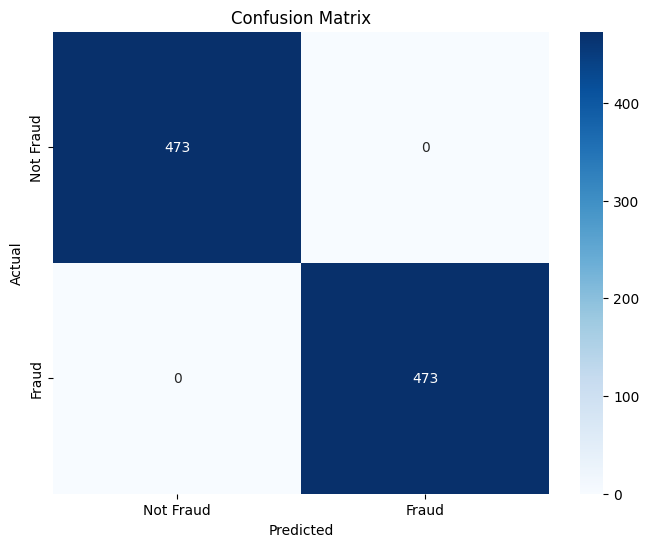


Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946


Evaluation Results for Gradient Boosting with RandomUnderSampler:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1_score: 1.0000
Roc_auc: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946

-------------------------------------------

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:15:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


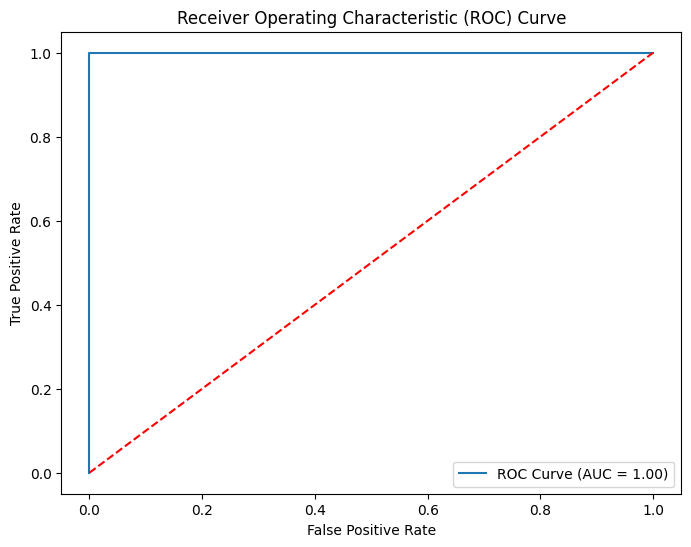

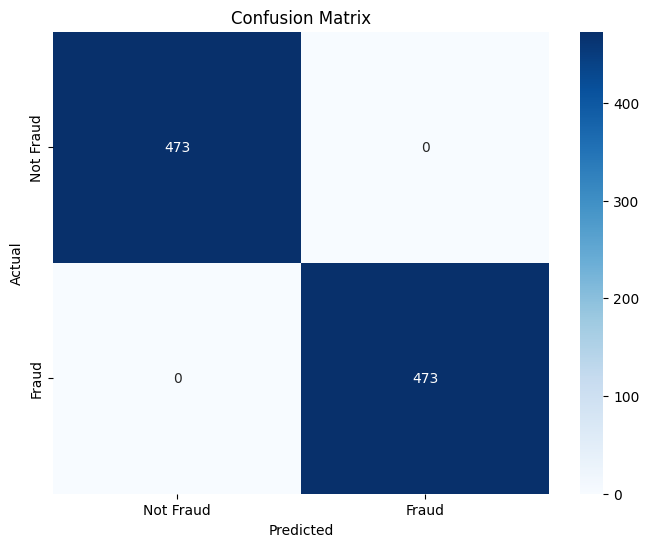


Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946


Evaluation Results for XGBoost with RandomUnderSampler:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1_score: 1.0000
Roc_auc: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       473

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946

-----------------------------------------------------

In [ ]:
# Call function for RandomUnderSampler data
ensemble_models_rus = get_ensemble_models()
print("\nEvaluating Ensemble Models with RandomUnderSampler data...")

results_rus = evaluate_ensemble_models(
    models=ensemble_models_rus,
    X_train=X_resampled_rus,
    y_train=y_resampled_rus,
    X_test=X_resampled_rus,  # Use resampled data for testing as well
    y_test=y_resampled_rus,
    dataset_name="RandomUnderSampler"
)



Training StackingClassifier with RandomUnderSampler data...
Splitting Datasets...
Successfully split the dataset!
Training set size: (756, 20), Test set size: (190, 20)

Evaluating StackingClassifier with RandomUnderSampler data...


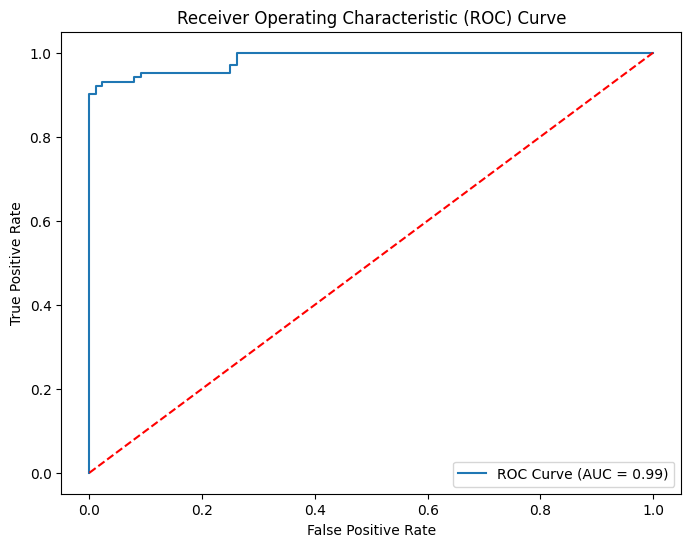

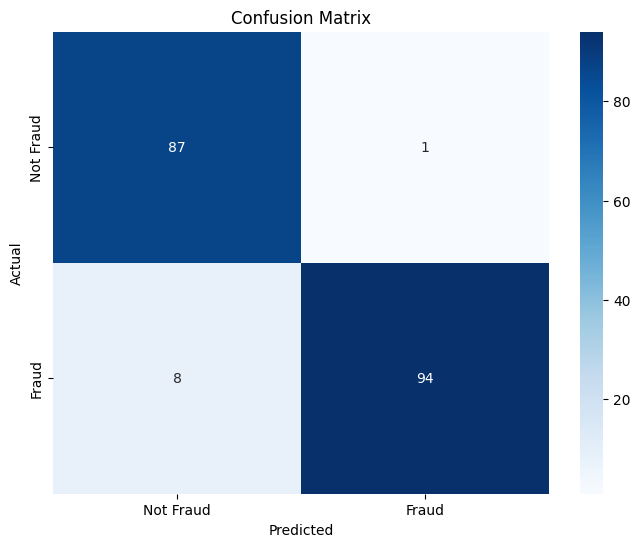


Evaluation Metrics:
Accuracy: 0.9526
Precision: 0.9895
Recall: 0.9216
F1-Score: 0.9543
ROC-AUC: 0.9853

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        88
           1       0.99      0.92      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.96      0.95       190
weighted avg       0.96      0.95      0.95       190


Evaluation Results for StackingClassifier with RandomUnderSampler:
Accuracy: 0.9526
Precision: 0.9895
Recall: 0.9216
F1_score: 0.9543
Roc_auc: 0.9853

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        88
           1       0.99      0.92      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.96      0.95       190
weighted avg       0.96      0.95      0.95       190



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, max_depth=best_params['Decision Tree']['max_depth'], random_state=42)),
    ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=best_params['Decision Tree']['max_depth']), n_estimators=10, random_state=42)),
]

# Define the meta-learner
meta_learner = LogisticRegression(C=best_params['Logistic Regression']['C'], random_state=42)

# Initialize the StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=3, n_jobs=-1)

# Train the model on RandomUnderSampler data
print("\nTraining StackingClassifier with RandomUnderSampler data...")
X_train_rus, X_test_rus, y_train_rus, y_test_rus = split_data(X_resampled_rus, y_resampled_rus)
stacking_model.fit(X_train_rus, y_train_rus)

# Evaluate the model
print("\nEvaluating StackingClassifier with RandomUnderSampler data...")
evaluation_results_stacking_rus = evaluate_model(stacking_model, X_test_rus, y_test_rus)

# Print Evaluation Results
print("\nEvaluation Results for StackingClassifier with RandomUnderSampler:")
for metric, value in evaluation_results_stacking_rus.items():
    if metric not in ['confusion_matrix', 'classification_report']:
        print(f"{metric.capitalize()}: {value:.4f}")
    elif metric == 'classification_report':
        print("\nClassification Report:\n", value)


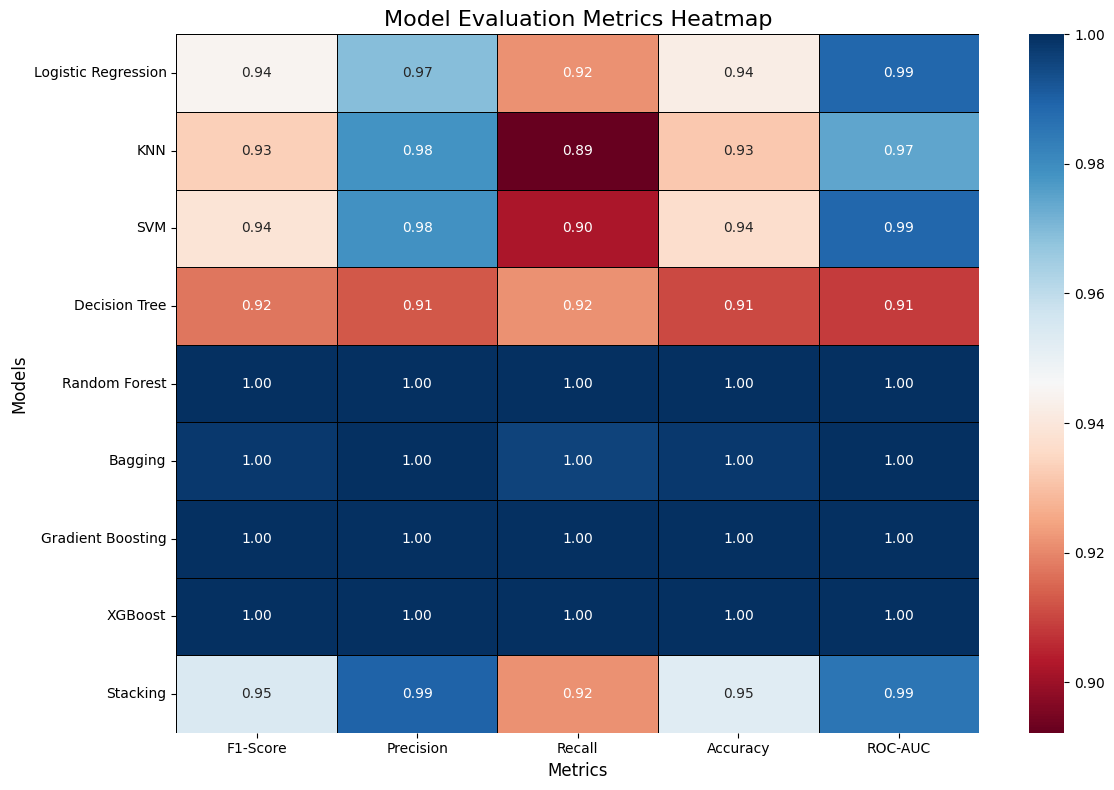

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect the evaluation results for different models into a dictionary
evaluation_results = {
    "Logistic Regression": [0.9447, 0.9691, 0.9216, 0.9421, 0.9887],
    "KNN": [0.9333, 0.9785, 0.8922, 0.9316, 0.9746],
    "SVM": [0.9388, 0.9787, 0.9020, 0.9368, 0.9890],
    "Decision Tree": [0.9171, 0.9126, 0.9216, 0.9105, 0.9083],
    "Random Forest": [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    "Bagging": [0.9979, 1.0000, 0.9958, 0.9979, 1.0000],
    "Gradient Boosting": [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    "XGBoost": [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    "Stacking": [0.9543, 0.9895, 0.9216, 0.9526, 0.9853],
}

# Convert the dictionary into a DataFrame
columns = ["F1-Score", "Precision", "Recall", "Accuracy", "ROC-AUC"]
df = pd.DataFrame(evaluation_results, index=columns).T

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt=".2f", cmap="RdBu", linewidths=0.5, linecolor="black")
plt.title("Model Evaluation Metrics Heatmap", fontsize=16)
plt.ylabel("Models", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


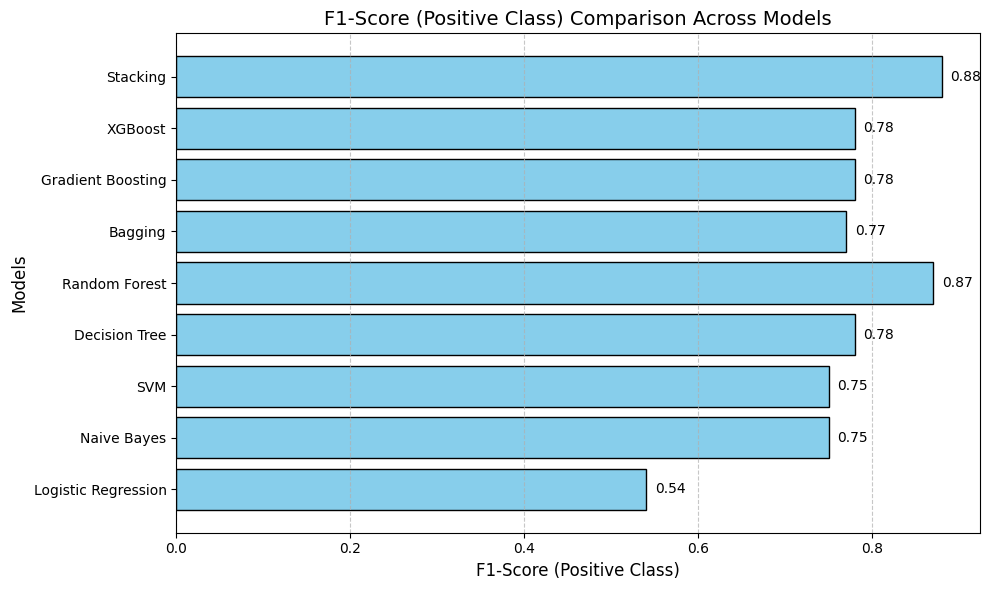

In [ ]:
import matplotlib.pyplot as plt

# F1-Scores for each model
model_scores = {
    "Logistic Regression": 0.54,
    "Naive Bayes": 0.75,
    "SVM": 0.75,
    "Decision Tree": 0.78,
    "Random Forest": 0.87,
    "Bagging": 0.77,
    "Gradient Boosting": 0.78,
    "XGBoost": 0.78,
    "Stacking": 0.88
}

# Convert dictionary to lists for plotting
models = list(model_scores.keys())
f1_scores = list(model_scores.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(models, f1_scores, color='skyblue', edgecolor='black')
plt.xlabel("F1-Score (Positive Class)", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.title("F1-Score (Positive Class) Comparison Across Models", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate scores on the bars
for index, score in enumerate(f1_scores):
    plt.text(score + 0.01, index, f"{score:.2f}", va='center', fontsize=10)

# Show plot
plt.show()


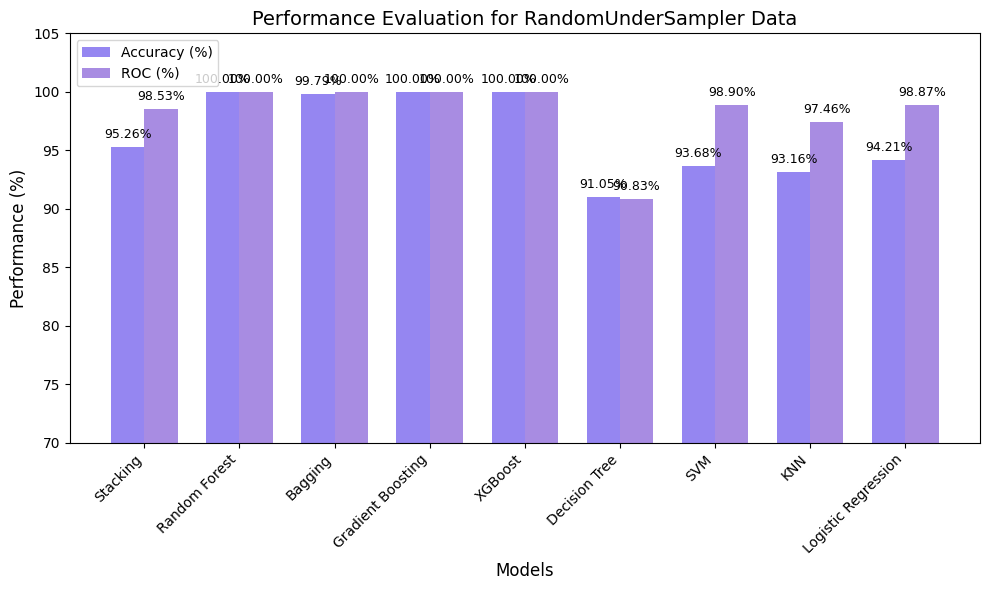

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: Model names and metrics
models = ["Stacking", "Random Forest", "Bagging", "Gradient Boosting", "XGBoost", "Decision Tree", "SVM", "KNN", "Logistic Regression"]
accuracy = [95.26, 100.0, 99.79, 100.0, 100.0, 91.05, 93.68, 93.16, 94.21]
roc_auc = [98.53, 100.0, 100.0, 100.0, 100.0, 90.83, 98.90, 97.46, 98.87]

# Convert metrics to percentages
accuracy_percent = np.array(accuracy)
roc_auc_percent = np.array(roc_auc)

x = np.arange(len(models))  # Label locations
width = 0.35  # Bar width

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, accuracy_percent, width, label='Accuracy (%)', color='mediumslateblue', alpha=0.8)
bars2 = ax.bar(x + width/2, roc_auc_percent, width, label='ROC (%)', color='mediumpurple', alpha=0.8)

# Add annotations on the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=9)

# Add labels, title, and legend
ax.set_ylabel("Performance (%)", fontsize=12)
ax.set_xlabel("Models", fontsize=12)
ax.set_title("Performance Evaluation for RandomUnderSampler Data", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylim(70, 105)  # Adjust the range for better visibility
ax.legend(loc='upper left', fontsize=10)

# Final layout adjustments
plt.tight_layout()
plt.show()
